# Unificación de los datasets Skin Cancer(Original y PAD-UFES-20)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Carga de datasets

In [2]:
# URL del dataset original en GitHub
url = 'https://raw.githubusercontent.com/mariaelisaaraya/M1000IA/refs/heads/master/metadatos%20filtrados/filtrado_HAM10000_metadata.csv'




# Leer el archivo CSV desde la URL
df_original = pd.read_csv(url)

# Primeras filas del dataset

print(df_original.head())
print(df_original.shape)

     lesion_id      image_id   dx   age   sex localization   Clasificacion  \
0  HAM_0000118  ISIC_0027419  bkl  80.0  male        scalp  Lesión Benigna   
1  HAM_0000118  ISIC_0025030  bkl  80.0  male        scalp  Lesión Benigna   
2  HAM_0002730  ISIC_0026769  bkl  80.0  male        scalp  Lesión Benigna   
3  HAM_0002730  ISIC_0025661  bkl  80.0  male        scalp  Lesión Benigna   
4  HAM_0001466  ISIC_0031633  bkl  75.0  male          ear  Lesión Benigna   

    Dataset  
0  Original  
1  Original  
2  Original  
3  Original  
4  Original  
(5077, 8)


In [3]:
# URL del dataset original en GitHub
url ='https://raw.githubusercontent.com/mariaelisaaraya/M1000IA/refs/heads/master/metadatos%20filtrados/filtradoPAD-UFES-20.csv'

# Leer el archivo CSV desde la URL
df_Agregado = pd.read_csv(url)

# Primeras filas del dataset

print(df_Agregado)
print(df_Agregado.shape)

     lesion_id              image_id   dx  age     sex localization  \
0          881    PAT_46_881_939.png  BCC   55  FEMALE         NECK   
1         1302  PAT_684_1302_588.png  BCC   79    MALE      FOREARM   
2         1471  PAT_778_1471_835.png  BCC   52  FEMALE         FACE   
3          179   PAT_117_179_983.png  BCC   74  FEMALE         FACE   
4         1827  PAT_967_1827_247.png  BCC   34  FEMALE         NOSE   
..         ...                   ...  ...  ...     ...          ...   
938        203   PAT_136_203_436.png  BCC   60  FEMALE         NOSE   
939       1429  PAT_754_1429_380.png  MEL   75    MALE      FOREARM   
940        421   PAT_273_421_905.png  BCC   41    MALE         FACE   
941        880    PAT_46_880_140.png  BCC   55  FEMALE        CHEST   
942        690   PAT_326_690_823.png  BCC   58  FEMALE         FACE   

      Clasificacion Dataset  
0    Lesión Maligna   Extra  
1    Lesión Maligna   Extra  
2    Lesión Maligna   Extra  
3    Lesión Maligna   Extra

# Unificar valor de la variable dx (la que tiene las etiquetas) de  ambos datasets a mayúsculas
cambiamos las etiquetas del dataset agregado

In [4]:
# Transformar los valores de la columna 'dx' a mayúsculas
df_original['dx'] = df_original['dx'].str.upper()

# Mostrar el DataFrame resultante
print(df_original)
df_original.shape

        lesion_id      image_id   dx   age     sex     localization  \
0     HAM_0000118  ISIC_0027419  BKL  80.0    male            scalp   
1     HAM_0000118  ISIC_0025030  BKL  80.0    male            scalp   
2     HAM_0002730  ISIC_0026769  BKL  80.0    male            scalp   
3     HAM_0002730  ISIC_0025661  BKL  80.0    male            scalp   
4     HAM_0001466  ISIC_0031633  BKL  75.0    male              ear   
...           ...           ...  ...   ...     ...              ...   
5072  HAM_0004857  ISIC_0029038   NV  70.0    male  lower extremity   
5073  HAM_0003384  ISIC_0031299   NV  55.0  female            chest   
5074  HAM_0001410  ISIC_0024830   NV  15.0  female            chest   
5075  HAM_0000102  ISIC_0032221   NV  20.0    male             back   
5076  HAM_0003521  ISIC_0032258  MEL  70.0  female             back   

       Clasificacion   Dataset  
0     Lesión Benigna  Original  
1     Lesión Benigna  Original  
2     Lesión Benigna  Original  
3     Lesión Be

(5077, 8)

### Cambiar los valores de la variable image_id del dataset original para que tenga ademas del nombre del archivo de la la imagen la extensión del mismo

In [5]:
# Agregar la extensión .jpg a los valores de la columna 'image_id'
df_original['image_id'] = df_original['image_id'] + '.jpg'

# Unir los dos datasets en uno solo

In [6]:
# Unir los DataFrames verticalmente
df_Unido = pd.concat([df_original, df_Agregado], ignore_index=True)
df_Unido.shape

(6020, 8)

# Verifica nulos

In [7]:
# ver cantidad de valores nulos
nulos_por_columna = df_Unido.isnull().sum()
print("Cantidad de valores nulos por columna")
print(nulos_por_columna)

#ver cantidad de filas duplicadas
duplicados = df_Unido.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de valores nulos por columna
lesion_id        0
image_id         0
dx               0
age              0
sex              0
localization     0
Clasificacion    0
Dataset          0
dtype: int64
Cantidad de filas duplicadas: 0


### ver opciones  de clasificación


1.  4 etiquetas (bcc, mel, nev, sek+bkl
2.  2 etiquetas maligno (bcc+mel) y maligno (nv, sex+bkl)
=


### 1- Vamos a cambiar las etiquetas BKL y SEK por BKL-SEK
### 2 - Calculamos distribucion de dataset unido

In [8]:
# Cambiar los valores de 'dx'
df_Unido['dx'] = df_Unido['dx'].replace({'SEK': 'SEK-BKL', 'BKL': 'SEK-BKL'})

# Mostrar el DataFrame resultante
print(df_Unido)

        lesion_id              image_id       dx   age     sex localization  \
0     HAM_0000118      ISIC_0027419.jpg  SEK-BKL  80.0    male        scalp   
1     HAM_0000118      ISIC_0025030.jpg  SEK-BKL  80.0    male        scalp   
2     HAM_0002730      ISIC_0026769.jpg  SEK-BKL  80.0    male        scalp   
3     HAM_0002730      ISIC_0025661.jpg  SEK-BKL  80.0    male        scalp   
4     HAM_0001466      ISIC_0031633.jpg  SEK-BKL  75.0    male          ear   
...           ...                   ...      ...   ...     ...          ...   
6015          203   PAT_136_203_436.png      BCC  60.0  FEMALE         NOSE   
6016         1429  PAT_754_1429_380.png      MEL  75.0    MALE      FOREARM   
6017          421   PAT_273_421_905.png      BCC  41.0    MALE         FACE   
6018          880    PAT_46_880_140.png      BCC  55.0  FEMALE        CHEST   
6019          690   PAT_326_690_823.png      BCC  58.0  FEMALE         FACE   

       Clasificacion   Dataset  
0     Lesión Benig

### Ver distribución de imagenes x tipo

In [9]:
#Distribución de imagenes según tipo de lesión (considerando 4 etiquetas)

# Agrupar por tipo de lesion  y contar las lesiones
lesiones_por_etiqueta = df_Unido.groupby('dx').size().reset_index(name='cantidad_de_lesiones')

# Mostrar la tabla resultante
print(lesiones_por_etiqueta)

        dx  cantidad_de_lesiones
0      BCC                  1354
1      MEL                  1153
2       NV                  2391
3  SEK-BKL                  1122


<ipython-input-10-458d80d8335c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dx', y='cantidad_de_lesiones', data=lesiones_por_etiqueta, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

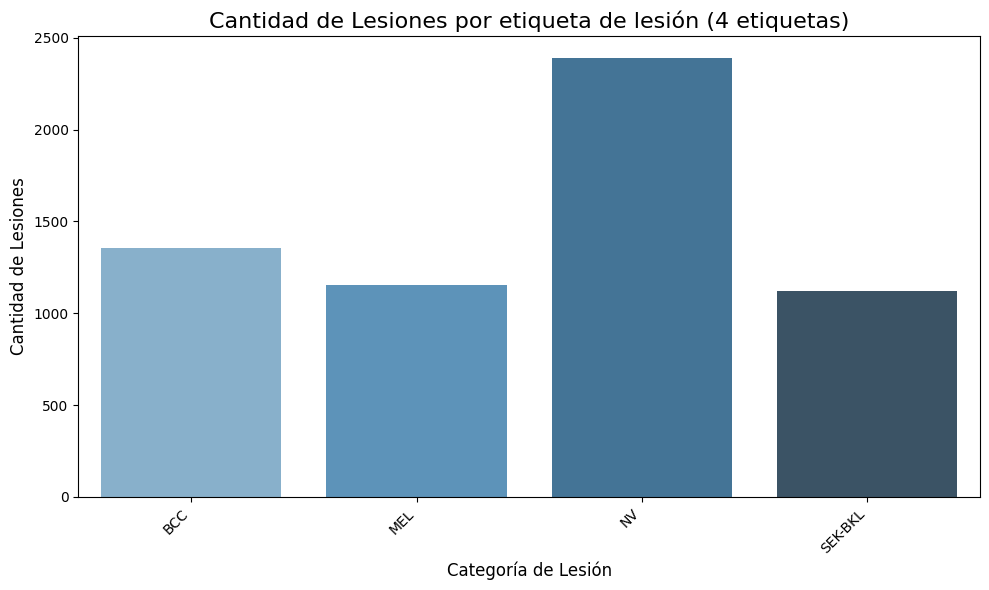

In [10]:
#Graficar las lesiones por tipo
# Crear un gráfico de barras con seaborn
plt.figure(figsize=(10, 6))  # Establece el tamaño del gráfico
sns.barplot(x='dx', y='cantidad_de_lesiones', data=lesiones_por_etiqueta, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Cantidad de Lesiones por etiqueta de lesión (4 etiquetas)', fontsize=16)
plt.xlabel('Categoría de Lesión', fontsize=12)
plt.ylabel('Cantidad de Lesiones', fontsize=12)

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [11]:
#Distribución de imagenes según tipo de lesión (considerando maligno/benigno)

# Agrupar por tipo de lesion  y contar las lesiones
lesiones_por_tipo = df_Unido.groupby('Clasificacion').size().reset_index(name='cantidad_de_lesiones')

# Mostrar la tabla resultante
print(lesiones_por_tipo)

    Clasificacion  cantidad_de_lesiones
0  Lesión Benigna                  3513
1  Lesión Maligna                  2507


<ipython-input-11-aa12c6238dad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clasificacion', y='cantidad_de_lesiones', data=lesiones_por_tipo, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


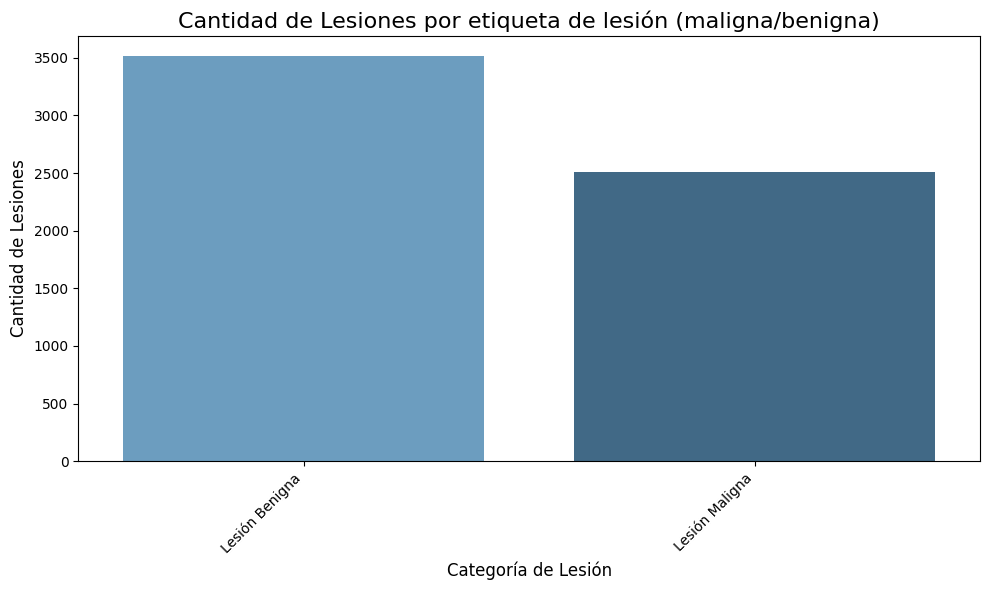

In [ ]:
#Graficar las lesiones por tipo
# Crear un gráfico de barras con seaborn
plt.figure(figsize=(10, 6))  # Establece el tamaño del gráfico
sns.barplot(x='Clasificacion', y='cantidad_de_lesiones', data=lesiones_por_tipo, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Cantidad de Lesiones por etiqueta de lesión (maligna/benigna)', fontsize=16)
plt.xlabel('Categoría de Lesión', fontsize=12)
plt.ylabel('Cantidad de Lesiones', fontsize=12)

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
### guardar en disco el archivo de metadatos unidos

In [13]:
df_Unido.to_csv('union_HAM10000_PAD-UFES-20.csv', index=False)
df_Unido.shape

(6020, 8)